# Exploratory Data Analysis

#### Objective:
To perform EDA on loan dataset and find the main factors that lead to customers being charged off, along with insights into why they default on loans.

In [151]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [153]:
# prevent pandas from truncating output
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('display.width', 1000)

In [154]:
# load dataset
loan = pd.read_csv(r"C:\Users\MI\Downloads\Upgrad\Lending Club Case Study\loan.csv")
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [155]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], dtype='object', length=111)

Our target variable is 'loan_status' which has 3 categories - 'Fully Paid', 'Charged Off', 'Current'

Fully Paid: Loan amount has been paid completely <br>
Charged Off: Default <br>
Current: Installments are currently being paid

In [318]:
loan.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64



## 1. Null Values Treatment

In [156]:
# Checking null values
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [157]:
# null values in percentage
null_values_pct = round((loan.isnull().sum()/len(loan))*100,2)
null_values_pct

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.59
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [158]:
# Checking columns which have more than 30% null values
null_values_pct[null_values_pct>30]

desc                               32.59
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m    

In [159]:
# Drop null columns from loan df
null_cols = null_values_pct[null_values_pct>30].index
loan = loan.drop(null_cols, axis=1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.

In [160]:
# checking null value % for the new loan dataset after dropping the columns having more than 30% null values
nulls = round((loan.isnull().sum()/len(loan))*100,2)
nulls

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [161]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [162]:
# checking columns which have 1 or more null values
null_cols_data = loan[nulls[nulls>0].index]
null_cols_data.head(25)

,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Computer,83.70%,Jan-15,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,bike,9.40%,Apr-13,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,real estate business,98.50%,Jun-14,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,personel,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Personal,53.90%,May-16,May-16,0.0,0.0,0.0,0.0
5,Veolia Transportaton,3 years,My wedding loan I promise to pay back,28.30%,Jan-15,Jan-16,0.0,0.0,0.0,0.0
6,Southern Star Photography,8 years,Loan,85.60%,May-16,May-16,0.0,0.0,0.0,0.0
7,MKC Accounting,9 years,Car Downpayment,87.50%,Jan-15,Dec-14,0.0,0.0,0.0,0.0
8,NaN,4 years,Expand Business & Buy Debt Portfolio,32.60%,Apr-12,Aug-12,0.0,0.0,0.0,0.0
9,Starbucks,< 1 year,Building my credit history.,36.50%,Nov-12,Mar-13,0.0,0.0,0.0,0.0


In [163]:
# checking null value % for columns having nulls
null_pct = nulls[nulls>0]
null_pct

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

#### 'emp_title' column

In [164]:
print('total length of loan df = ', len(loan))
print('length of null values in emp_title = ', loan.emp_title.isnull().sum())
print('lenth of non null values in emp_title = ', len(loan) - loan.emp_title.isnull().sum())
print('length of unique values in emp_title = ', loan.emp_title.nunique())

total length of loan df =  39717
length of null values in emp_title =  2459
lenth of non null values in emp_title =  37258
length of unique values in emp_title =  28820


From above analysis, we can say, not all the values in 'emp_title' are unique. It has repeated values as well. <br>
We will see those values which frequencies are > 1 or more.

In [165]:
emp_title_freq = loan.emp_title.value_counts()
emp_title_freq[emp_title_freq>20]

emp_title
US Army                            134
Bank of America                    109
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Wells Fargo                         54
USAF                                54
UPS                                 53
US Air Force                        52
Walmart                             45
Lockheed Martin                     44
United States Air Force             42
State of California                 42
U.S. Army                           41
Verizon Wireless                    40
Self Employed                       40
USPS                                39
US ARMY                             39
Walgreens                           38
JP Morgan Chase                     37
Department of Defense               36
JPMorgan Chase                      36
Self                                35
Target                              35
US Navy                             35
Northrop Grumma

Here, in 'emp_title', it is not wise to impute the null values with the mode because 'US Army' has very less frquency compared to the null values count. <br>
We can impute with some other category like 'unknown'. 

In [166]:
loan.emp_title.fillna('unknown', inplace=True)
loan.emp_title.isnull().sum()

np.int64(0)

#### 'emp_length' column

In [167]:
# unique values
emp_length_value_counts = loan.emp_length.value_counts()
emp_length_value_counts

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [168]:
loan.emp_length.isnull().sum()

np.int64(1075)

So, null values are 1075/39717 is 2.7% in emp_length which is a small percentage. <br>
Hence, removing rows having null values is not feasible here. <br>
We can impute these values. For imputing 1075 null values with mode (10+ years) which has 8879 values would slightly increase this frequency and it may be a false data if we compare this column with the target variable. <br>
Another approach to impute the nulls is we can make a different category 'unknown' which would not create any false data. 

In [169]:
loan.emp_length.fillna('unknown', inplace=True)
loan.emp_length.isnull().sum()

np.int64(0)

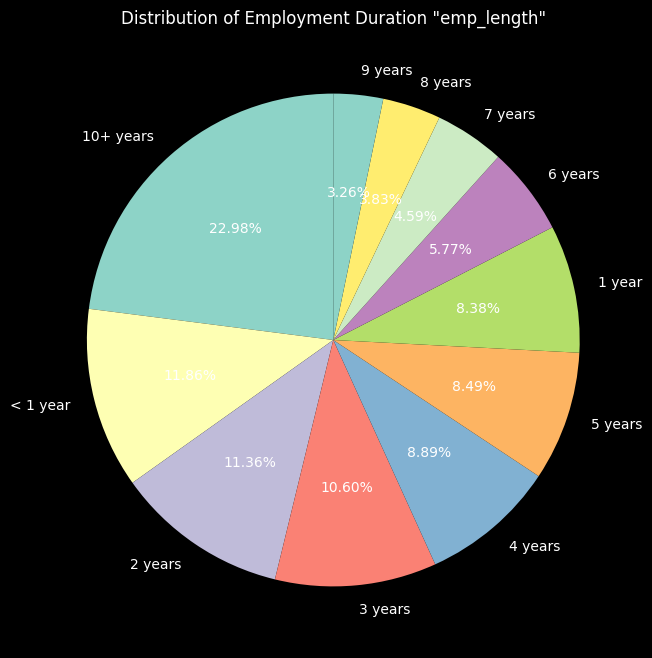

In [170]:
# emp_length pie chart
plt.style.use('dark_background')
plt.figure(figsize=(8, 8))
plt.pie(
    emp_length_value_counts,
    labels=emp_length_value_counts.index,
    autopct='%1.2f%%',
    startangle=90
)
plt.title('Distribution of Employment Duration "emp_length"')
plt.show()

#### 'title' column

In [171]:
# unique values in 'title' > 100
title_value_counts = loan.title.value_counts()
title_value_counts[title_value_counts>100]

title
Debt Consolidation           2184
Debt Consolidation Loan      1729
Personal Loan                 659
Consolidation                 517
debt consolidation            505
Credit Card Consolidation     356
Home Improvement              356
Debt consolidation            334
Small Business Loan           328
Credit Card Loan              317
Personal                      308
Consolidation Loan            255
Home Improvement Loan         247
personal loan                 234
personal                      220
Loan                          213
Wedding Loan                  208
consolidation                 205
Car Loan                      204
Other Loan                    191
Credit Card Payoff            154
Wedding                       154
Major Purchase Loan           145
Credit Card Refinance         144
Consolidate                   126
Medical                       122
Credit Card                   118
home improvement              111
Name: count, dtype: int64

In [172]:
# null values in 'title'
loan.title.isnull().sum()

np.int64(11)

In [173]:
# impute 'title' null values with the mode
loan.title.fillna(loan.title.mode()[0], inplace=True)
loan.title.isnull().sum()

np.int64(0)

#### 'revol_util' column 
revol_util = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [174]:
loan.revol_util.isnull().sum()

np.int64(50)

revol_util is a numerical column which is written in % with % sign, due to that it has become categorical column. We need to remove '%' and make the column numerical.

In [175]:
loan['revol_util'] = loan.revol_util.apply(lambda x: float(str(x).replace('%', '').strip()))
loan.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64

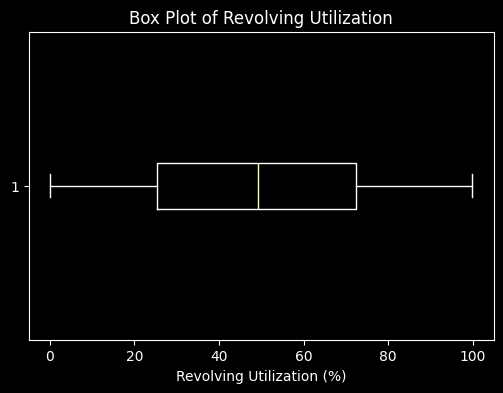

In [176]:
# box plot of 'revol_util'
plt.figure(figsize=(6, 4))
plt.boxplot(loan['revol_util'].dropna(), vert=False)
plt.title('Box Plot of Revolving Utilization')
plt.xlabel('Revolving Utilization (%)')
plt.show()

In [177]:
# revol_util looks like properly distributed and we can impute null values with the median.
loan.revol_util.fillna(loan.revol_util.median(), inplace=True)
loan.revol_util.isnull().sum()

np.int64(0)

#### 'collections_12_mths_ex_med' column

In [178]:
# unique values in 'collections_12_mths_ex_med'
loan.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

#### 'chargeoff_within_12_mths' column

In [179]:
# unique values in 'chargeoff_within_12_mths'
loan.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

#### 'tax_liens' column

In [180]:
# unique values in 'tax_liens'
loan.tax_liens.value_counts()

tax_liens
0.0    39678
Name: count, dtype: int64

we can remove 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens' columns as they have only 1 unique value

In [181]:
loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,unknown,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,unknown,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.1,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,1,INDIVIDUAL,0,0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.9,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,1,INDIVIDUAL,0,0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,unknown,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.4,20,f,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,1,INDIVIDUAL,0,0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,unknown,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.7,26,f,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07

#### 'pub_rec_bankruptcies' column

In [182]:
# unique values in 'pub_rec_bankruptcies'
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [183]:
loan.pub_rec_bankruptcies.isnull().sum()

np.int64(697)

In [184]:

# imputing null values in 'pub_rec_bankruptcies' wth median
loan.pub_rec_bankruptcies.fillna(loan.pub_rec_bankruptcies.median(), inplace=True)
loan.pub_rec_bankruptcies.isnull().sum()

np.int64(0)

#### Final check on null values if they are present in the loan dataframe.

In [185]:
print(loan.isnull().sum())

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
purpose                     0
title                       0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
out_prncp 

still, there are 2 columns which have null values - 'last_pymnt_d', 'last_credit_pull_d'

#### 'last_pymnt_d' column

In [186]:
print(loan.last_pymnt_d.dtype)
print(loan.last_credit_pull_d.dtype)

object
object


In [187]:
# unique values in 'last_pymnt_d' having frequency > 500
last_pymnt_date_value_counts = loan.last_pymnt_d.value_counts()
last_pymnt_date_value_counts[last_pymnt_date_value_counts>500]

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Jan-14     832
Aug-12     832
Aug-14     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Name: count, dtype: int64

In [188]:
# imputing null values with mode
loan.last_pymnt_d.fillna(loan.last_pymnt_d.mode()[0], inplace=True)
loan.last_pymnt_d.isnull().sum()

np.int64(0)

#### 'last_credit_pull_d' column

In [189]:
# imputing null values with mode
loan.last_credit_pull_d.fillna(loan.last_credit_pull_d.mode()[0], inplace=True)
loan.last_credit_pull_d.isnull().sum()

np.int64(0)

In [190]:
# Missing values check
nulls = loan.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

#### Now, there is no null value present in the dataset. Missing value treatment has been completed.

#
## 2. Datatype Treatment

We will separate numerical and categorical columns, then we will check if a numerical column is actually a numerical column or a categorical column is actually a categorical column. if not, then we will take the required steps to convert them into correct datatype. 

We can also remove those categorical columns which have lots of unique values, more than 50% because those columns are of no use.

In [191]:
# separate numerical and categorical columns
num_cols = loan.select_dtypes(include=['number']).columns.tolist()
cat_cols = loan.select_dtypes(exclude=['number']).columns.tolist()
print(num_cols)
print(cat_cols)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies']
['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']


####    2.1  Categorical columns 'cat_cols'

In [192]:
# in cat_cols, some columns are object columns which actually are datetime objects. We need to convert them into datetime. 'int_rate' column is actually numeric column, we need to convert that into numerical column
loan['int_rate'] = loan.int_rate.apply(lambda x: float(str(x).replace('%', '').strip()))

loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y', errors='coerce')
loan['issue_d'] = loan['issue_d'].dt.strftime('%m-%Y') # Format it as MM-YYYY

loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y', errors='coerce')
loan['earliest_cr_line'] = loan['earliest_cr_line'].dt.strftime('%m-%Y') # Format it as MM-YYYY

loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y', errors='coerce')
loan['last_pymnt_d'] = loan['last_pymnt_d'].dt.strftime('%m-%Y') # Format it as MM-YYYY

loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y', errors='coerce')
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].dt.strftime('%m-%Y') # Format it as MM-YYYY

# Again separate num_cols & cat_cols
num_cols = loan.select_dtypes(include=['number']).columns.tolist()
cat_cols = loan.select_dtypes(exclude=['number']).columns.tolist()

loan[cat_cols]

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,unknown,10+ years,RENT,Verified,12-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,01-1985,f,01-2015,05-2016,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,12-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,04-1999,f,04-2013,09-2013,INDIVIDUAL
2,36 months,C,C5,unknown,10+ years,RENT,Not Verified,12-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,11-2001,f,06-2014,05-2016,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,12-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,02-1996,f,01-2015,04-2016,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,12-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,01-1996,f,05-2016,05-2016,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,07-2007,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11-1990,f,07-2010,06-2010,INDIVIDUAL
39713,36 months,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,07-2007,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,12-1986,f,07-2010,07-2010,INDIVIDUAL
39714,36 months,A,A4,unknown,< 1 year,MORTGAGE,Not Verified,07-2007,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,10-1998,f,04-2008,06-2007,INDIVIDUAL
39715,36 months,A,A2,unknown,< 1 year,MORTGAGE,Not Verified,07-2007,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,11-1988,f,01-2008,06-2007,INDIVIDUAL


In [193]:
# Number of unique values in all the categorical columns
loan[cat_cols].nunique()

term                       2
grade                      7
sub_grade                 35
emp_title              28821
emp_length                12
home_ownership             5
verification_status        3
issue_d                   55
loan_status                3
pymnt_plan                 1
url                    39717
purpose                   14
title                  19615
zip_code                 823
addr_state                50
earliest_cr_line         526
initial_list_status        1
last_pymnt_d             101
last_credit_pull_d       106
application_type           1
dtype: int64

In [194]:
# % of unique values in all the categorical columns
round((loan[cat_cols].nunique()/len(loan))*100, 2)

term                     0.01
grade                    0.02
sub_grade                0.09
emp_title               72.57
emp_length               0.03
home_ownership           0.01
verification_status      0.01
issue_d                  0.14
loan_status              0.01
pymnt_plan               0.00
url                    100.00
purpose                  0.04
title                   49.39
zip_code                 2.07
addr_state               0.13
earliest_cr_line         1.32
initial_list_status      0.00
last_pymnt_d             0.25
last_credit_pull_d       0.27
application_type         0.00
dtype: float64

Remove 'emp_title', 'url', 'title' (columns which have too much around 50% or more unique values)

In [195]:
columns_to_remove = ['emp_title', 'url', 'title']
cat_cols = [col for col in cat_cols if col not in columns_to_remove]

Check categorical columns who have exactly 1 unique value only, so that we can remove those columns

In [196]:
cat_cols_nunique = loan[cat_cols].nunique()
cat_cols_nunique[cat_cols_nunique==1].index

Index(['pymnt_plan', 'initial_list_status', 'application_type'], dtype='object')

In [197]:
# Remove ['pymnt_plan', 'initial_list_status', 'application_type'] (columns which have only 1 unique value)
columns_to_remove = ['pymnt_plan', 'initial_list_status', 'application_type']
cat_cols = [col for col in cat_cols if col not in columns_to_remove]
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d']

#### 2.2 Numerical columns

In [198]:
loan[num_cols].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,0,0,0.0


We can Remove columns 'id', 'member_id' as they have unique identification numbers which does not contribute to the model or have no impact on the target variable.

In [199]:
columns_to_remove = ['id', 'member_id']
num_cols = [col for col in num_cols if col not in columns_to_remove]

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'policy_code',
 'acc_now_delinq',
 'delinq_amnt',
 'pub_rec_bankruptcies']

In [201]:
loan[num_cols].nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
int_rate                     371
installment                15383
annual_inc                  5318
dti                         2868
delinq_2yrs                   11
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_inv               1138
total_pymnt                37850
total_pymnt_inv            37518
total_rec_prncp             7976
total_rec_int              35148
total_rec_late_fee          1356
recoveries                  4040
collection_recovery_fee     2616
last_pymnt_amnt            34930
policy_code                    1
acc_now_delinq                 1
delinq_amnt                    1
pub_rec_bankruptcies           3
dtype: int64

In [202]:
# remove cols which have 1 unique values only
columns_to_remove = ['policy_code', 'acc_now_delinq', 'delinq_amnt']
num_cols = [col for col in num_cols if col not in columns_to_remove]

In [203]:
num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

Combining num_cols & cat_cols and assigning it in a new dataset 'loan_cleaned'

In [204]:
loan_cleaned = pd.concat([loan[num_cols], loan[cat_cols]], axis=1)
loan_cleaned

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,36 months,B,B2,10+ years,RENT,Verified,12-2011,Fully Paid,credit_card,860xx,AZ,01-1985,01-2015,05-2016
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,60 months,C,C4,< 1 year,RENT,Source Verified,12-2011,Charged Off,car,309xx,GA,04-1999,04-2013,09-2013
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,36 months,C,C5,10+ years,RENT,Not Verified,12-2011,Fully Paid,small_business,606xx,IL,11-2001,06-2014,05-2016
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,36 months,C,C1,10+ years,RENT,Source Verified,12-2011,Fully Paid,other,917xx,CA,02-1996,01-2015,04-2016
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,60 months,B,B5,1 year,RENT,Source Verified,12-2011,Current,other,972xx,OR,01-1996,05-2016,05-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,8.07,78.42,110000.0,11.33,0,0,13,0,7274,13.1,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,0.0,36 months,A,A4,4 years,MORTGAGE,Not Verified,07-2007,Fully Paid,home_improvement,802xx,CO,11-1990,07-2010,06-2010
39713,8500,8500,875.0,10.28,275.38,18000.0,6.40,1,1,6,0,8847,26.9,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,0.0,36 months,C,C1,3 years,RENT,Not Verified,07-2007,Fully Paid,credit_card,274xx,NC,12-1986,07-2010,07-2010
39714,5000,5000,1325.0,8.07,156.84,100000.0,2.30,0,0,11,0,9698,19.4,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,0.0,36 months,A,A4,< 1 year,MORTGAGE,Not Verified,07-2007,Fully Paid,debt_consolidation,017xx,MA,10-1998,04-2008,06-2007
39715,5000,5000,650.0,7.43,155.38,200000.0,3.72,0,0,17,0,85607,0.7,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,0.0,36 months,A,A2,< 1 year,MORTGAGE,Not Verified,07-2007,Fully Paid,other,208xx,MD,11-1988,01-2008,06-2007


In [205]:
# numerical columns describe
loan_cleaned.describe().round(2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00
mean,11219.44,10947.71,10397.45,12.02,324.56,68968.93,13.32,0.15,0.87,9.29,0.06,13382.53,48.83,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.04
std,7456.67,7187.24,7128.45,3.72,208.87,63793.77,6.68,0.49,1.07,4.40,0.24,15885.02,28.31,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.20
min,500.00,500.00,0.00,5.42,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5500.00,5400.00,5000.00,9.25,167.02,40404.00,8.17,0.00,0.00,6.00,0.00,3703.00,25.50,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00
50%,10000.00,9600.00,8975.00,11.86,280.22,59000.00,13.40,0.00,1.00,9.00,0.00,8850.00,49.30,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00
75%,15000.00,15000.00,14400.00,14.59,430.78,82300.00,18.60,0.00,1.00,12.00,0.00,17058.00,72.30,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00
max,35000.00,35000.00,35000.00,24.59,1305.19,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,99.90,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,2.00


In [206]:
# categorical columns describe
loan_cleaned.describe(include=['O'])

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717
unique,2,7,35,12,5,3,55,3,14,823,50,526,101,106
top,36 months,B,B3,10+ years,RENT,Not Verified,12-2011,Fully Paid,debt_consolidation,100xx,CA,11-1998,05-2016,05-2016
freq,29096,12020,2917,8879,18899,16921,2260,32950,18641,597,7099,370,1327,10310


## 3. Univariate, Bivariate and Multivariate Analysis
We will analyze the distribution of specific columns and examine their impact on the target variable or other columns through visualizations. Our goal is to identify the key factors that contribute to loans being charged off.

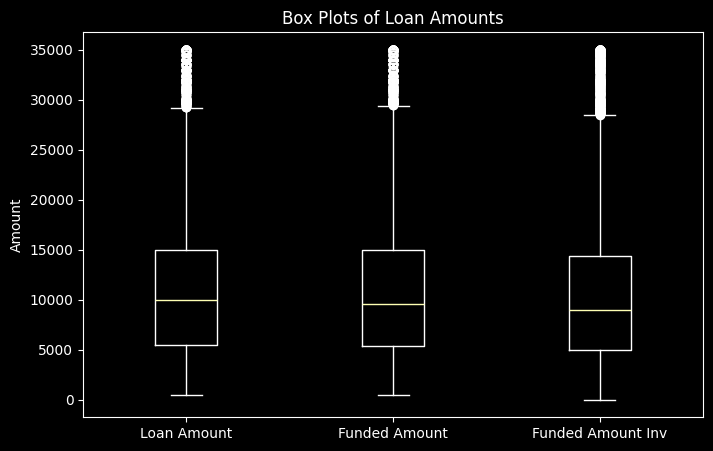

In [207]:
# Box plot of 'loan_amnt, 'funded_amnt', 'funded_amnt_inv'
plt.figure(figsize=(8, 5))
plt.boxplot(
    [loan_cleaned['loan_amnt'], loan_cleaned['funded_amnt'], loan_cleaned['funded_amnt_inv']],
    labels=['Loan Amount', 'Funded Amount', 'Funded Amount Inv']
)
plt.title('Box Plots of Loan Amounts')
plt.ylabel('Amount')
plt.show()

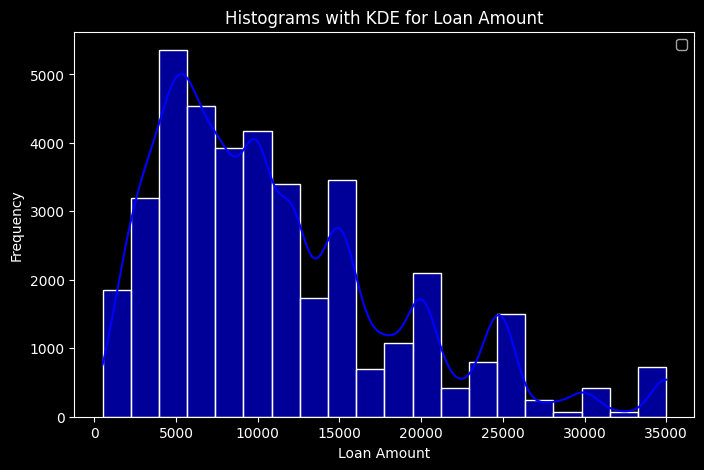

In [208]:
# Creating histograms with KDE for loan_amnt
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['loan_amnt'], kde=True, bins=20, color='blue', alpha=0.6)
plt.title('Histograms with KDE for Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

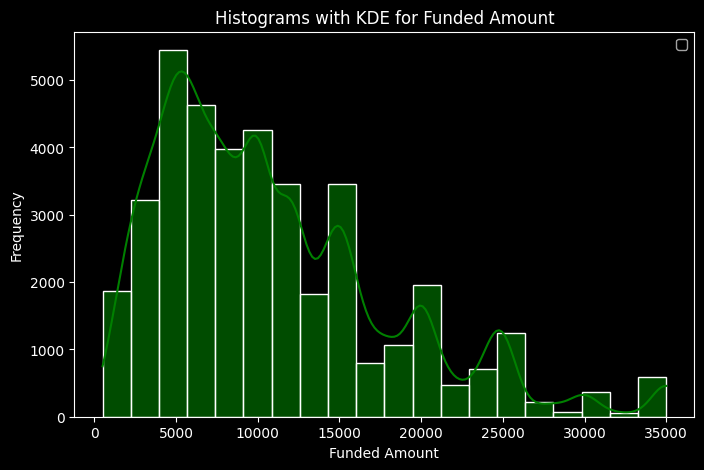

In [209]:
# Creating histograms with KDE for funded_amnt
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['funded_amnt'], kde=True, bins=20, color='green', alpha=0.6)
plt.title('Histograms with KDE for Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

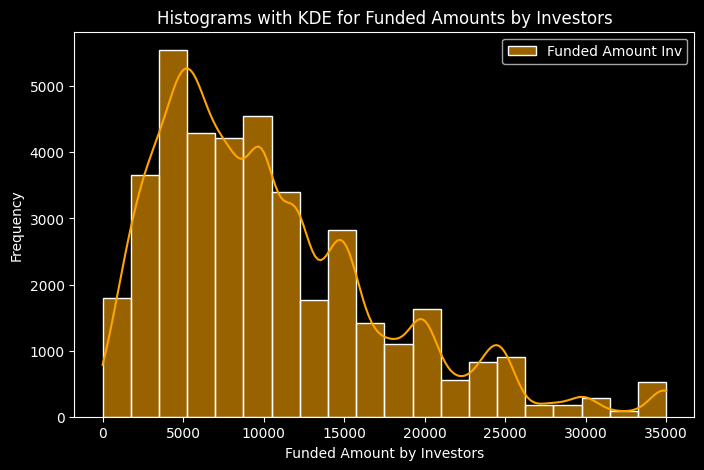

In [210]:
# Creating histograms with KDE for funded_amnt_inv
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['funded_amnt_inv'], kde=True, bins=20, label='Funded Amount Inv', color='orange', alpha=0.6)
plt.title('Histograms with KDE for Funded Amounts by Investors')
plt.xlabel('Funded Amount by Investors')
plt.ylabel('Frequency')
plt.legend()
plt.show()

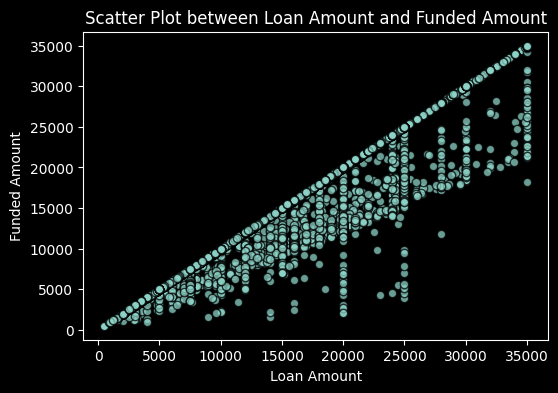

In [211]:
# Creating a scatter plot between `loan_amnt` and `funded_amnt`
plt.figure(figsize=(6, 4))
plt.scatter(loan_cleaned['loan_amnt'], loan_cleaned['funded_amnt'], alpha=0.75, edgecolor='black')
plt.title('Scatter Plot between Loan Amount and Funded Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Funded Amount')
#plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

It clearly shows a linear relationship between Loan amount and Funded amount. <br>
Also it is clear from the above plot that no value of Funded Amount is greater than Loan Amount which means no wrong data present in these two columns as funded amount can be same as loan amount or less than loan amount only.

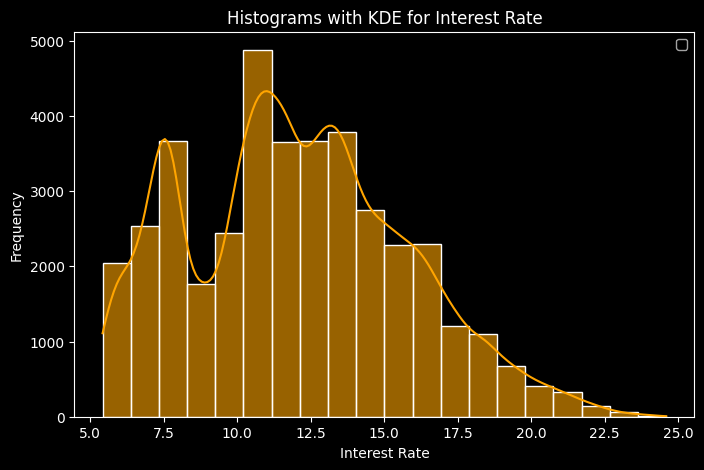

In [212]:
# Interest Rate
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['int_rate'], kde=True, bins=20, color='orange', alpha=0.6)
plt.title('Histograms with KDE for Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

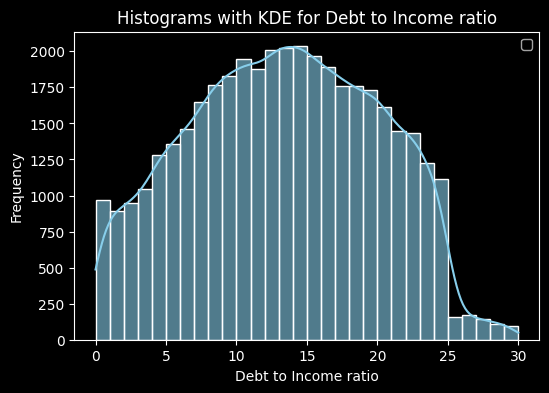

In [213]:
# Debt to Income ratio (dti)
plt.figure(figsize=(6, 4))
sns.histplot(loan_cleaned['dti'], kde=True, bins=30, color='skyblue', alpha=0.6)
plt.title('Histograms with KDE for Debt to Income ratio')
plt.xlabel('Debt to Income ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

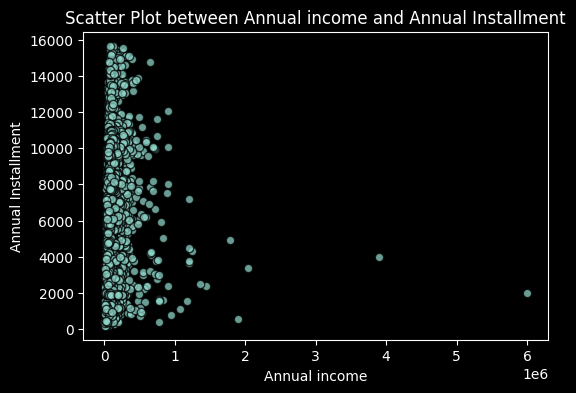

In [214]:
# We will compare 'annual_inc' with 'installment'
plt.figure(figsize=(6, 4))
plt.scatter(loan_cleaned['annual_inc'], loan_cleaned['installment']*12, alpha=0.75, edgecolor='black')
plt.title('Scatter Plot between Annual income and Annual Installment')
plt.xlabel('Annual income')
plt.ylabel('Annual Installment')
plt.show()

The range of Annual Income is upto 60 Lakhs while majority of data is below 4 or 5 Lakhs.

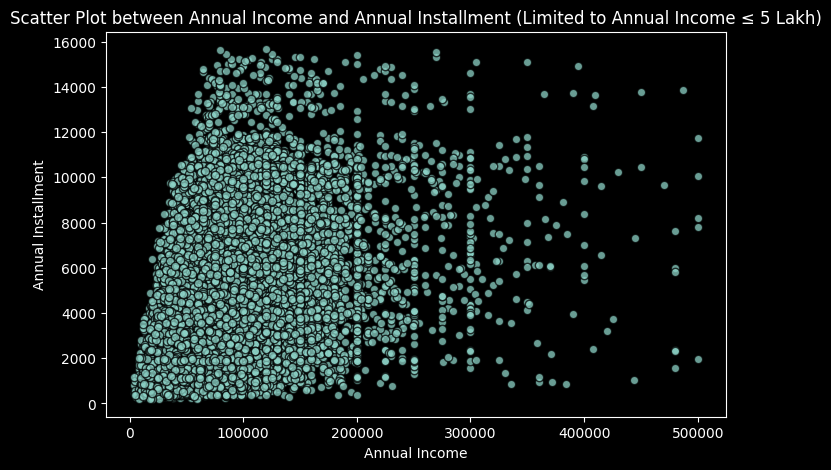

In [215]:
# annual_inc < 5 lakh
filtered_loan = loan_cleaned[loan_cleaned['annual_inc'] <= 500000]

# Scatter plot with the filtered data
plt.figure(figsize=(8, 5))
plt.scatter(filtered_loan['annual_inc'], filtered_loan['installment']*12, alpha=0.75, edgecolor='black')
plt.title('Scatter Plot between Annual Income and Annual Installment (Limited to Annual Income ≤ 5 Lakh)')
plt.xlabel('Annual Income')
plt.ylabel('Annual Installment')
plt.show()

We can see that as Annual income is rising, installment amount is also rising till annual_inc < 1 Lakh. After that it is random.

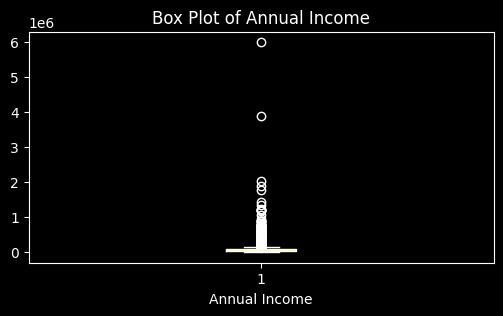

In [216]:
# Let's create boxplot for annual income as we can see there are outliers
plt.figure(figsize=(6, 3))
plt.boxplot(loan_cleaned['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

Clearly, there are outliers in annual_inc column

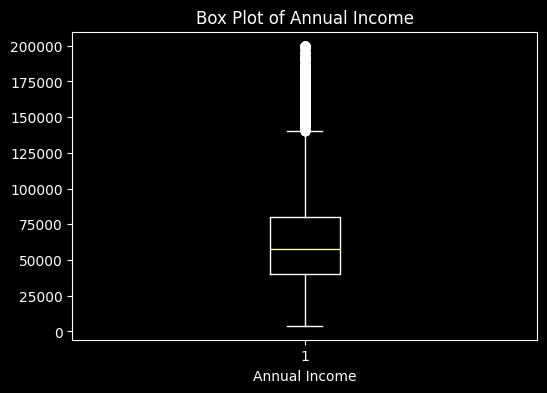

In [217]:
# Let's create a boxplot for annual_inc < 2 Lakh
filtered_loan = loan_cleaned[loan_cleaned['annual_inc'] <= 200000]
plt.figure(figsize=(6, 4))
plt.boxplot(filtered_loan['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

In [228]:
print('number of persons having annual income more than 2 Lakh = ', len(loan_cleaned) - len(filtered_loan))
print('percentage of persons having annual income more than 2 Lakh = ', round((len(loan_cleaned) - len(filtered_loan))/len(loan_cleaned)*100,2), '%')

number of persons having annual income more than 2 Lakh =  586
percentage of persons having annual income more than 2 Lakh =  1.48 %


In [227]:
print('annual_inc mean = ', round(loan_cleaned.annual_inc.mean(),2))
print('annual_inc median = ', loan_cleaned.annual_inc.median())
print('filtered_loan annual_inc median = ', filtered_loan.annual_inc.median())
print('annual_inc max = ', loan_cleaned.annual_inc.max())

annual_inc mean =  68968.93
annual_inc median =  59000.0
filtered_loan annual_inc median =  58000.0
annual_inc max =  6000000.0


In [229]:
# loan.annual_inc Upper extreme outliers
iqr = np.percentile(loan_cleaned.annual_inc, 75) - np.percentile(loan_cleaned.annual_inc, 25)
extreme_up_outlier = np.percentile(loan_cleaned.annual_inc, 75) + 3*iqr
print('extreme_up_outlier = ', extreme_up_outlier)
print('lenght of df having extreme_up_outlier = ', len(loan_cleaned[loan_cleaned.annual_inc>extreme_up_outlier]))

extreme_up_outlier =  207988.0
lenght of df having extreme_up_outlier =  537


In [319]:
# Let's check one more thing. If any higher income people (> 2 Lakh) have gone to default or not.
loan_cleaned[loan_cleaned.annual_inc>200000].loan_status.value_counts()

loan_status
Fully Paid     248
Charged Off     29
Current          7
Name: count, dtype: int64

60 out of 586 people who are earnning more than 2 Lakh annual income are charged off which means they are default. 

In [231]:
# Let's check what can be the reason who have high income and are still charged off.
# Let's compare with funded amount
loan_cleaned[(loan_cleaned.annual_inc>200000) & (loan_cleaned.loan_status == 'Charged Off')][[ 'annual_inc', 'funded_amnt', 'installment']].sort_values('funded_amnt')

,annual_inc,funded_amnt,installment
32959,384000.00,2000,71.01
11419,372000.00,2400,78.57
28989,540000.00,3000,74.87
32766,207000.00,3600,123.51
21980,304800.00,5000,158.72
25643,780000.00,6000,131.93
39669,213000.00,6500,225.37
20567,250000.00,7000,218.26
36105,230000.00,7000,239.61
36058,237000.00,9000,320.65


In [232]:
# Also we will check people who have low income and are charged off.
loan_cleaned[(loan_cleaned.annual_inc<60000) & (loan_cleaned.annual_inc>50000) & (loan_cleaned.loan_status == 'Charged Off')][[ 'annual_inc', 'funded_amnt', 'installment']].sort_values('funded_amnt').tail(15)

,annual_inc,funded_amnt,installment
13879,58000.0,29000,784.39
12186,52000.0,29100,980.36
1607,58500.0,29700,742.45
7778,52800.0,30000,737.38
14390,57600.0,30000,761.64
7171,56000.0,30000,662.95
6259,51600.0,30000,778.72
14011,52000.0,30225,703.13
5440,56472.0,31000,657.29
12328,53000.0,31825,830.65


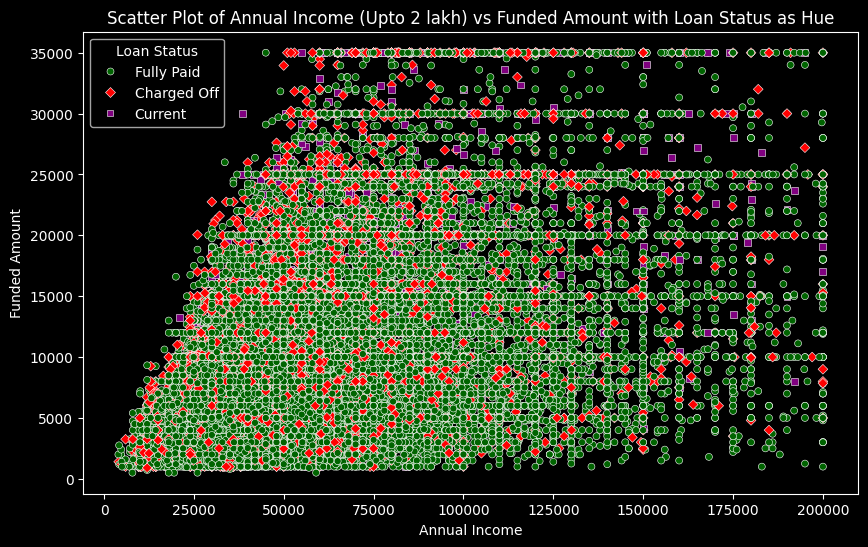

In [320]:
# Creating Scatter Plot of Annual Income vs Funded Amount with Loan Status as Hue
filtered_loan = loan_cleaned[loan_cleaned['annual_inc'] <= 200000]
plt.figure(figsize=(10, 6))
custom_palette = {'Fully Paid': '#006400', 'Current': '#800080', 'Charged Off': '#FF0000'}   # Custom colors
custom_markers = {'Fully Paid': 'o', 'Current': 's', 'Charged Off': 'D'}  # Custom marker shapes

sns.scatterplot(
    data=filtered_loan,
    x='annual_inc',
    y='funded_amnt',
    hue='loan_status',
    palette=custom_palette,  
    style='loan_status',
    markers=custom_markers, 
    s=25
)

plt.title('Scatter Plot of Annual Income (Upto 2 lakh) vs Funded Amount with Loan Status as Hue')
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount')
plt.legend(title='Loan Status')
plt.show()

From above chart, we can clearly say that there is no pattern between funded amount and annual income which impacts loan status. No inference from here. <br>
However, one thing we can infer that as annual income is incresing, funded amount has also increased but this is limited to annual income < 50000, after that it is random

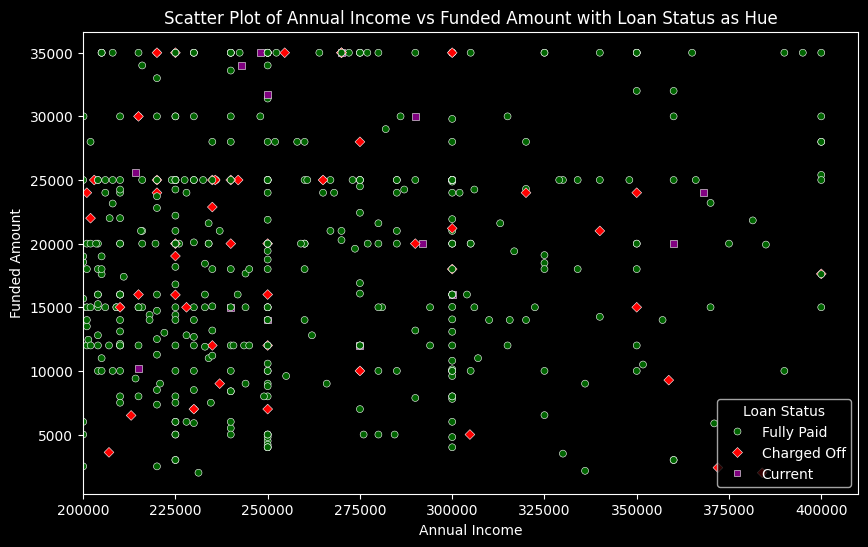

In [234]:
# We can also check with same chart for the people who have income > 2 Lakh and less than 4 Lakh
filtered_loan = loan_cleaned[(loan_cleaned['annual_inc'] > 200000) & (loan_cleaned['annual_inc'] <= 400000)]
plt.figure(figsize=(10, 6))
custom_palette = {'Fully Paid': '#006400', 'Current': '#800080', 'Charged Off': '#FF0000'}   # Custom colors
custom_markers = {'Fully Paid': 'o', 'Current': 's', 'Charged Off': 'D'}  # Custom marker shapes

sns.scatterplot(
    data=filtered_loan,
    x='annual_inc',
    y='funded_amnt',
    hue='loan_status',
    palette=custom_palette,  
    style='loan_status',
    markers=custom_markers, 
    s=25
)

plt.title('Scatter Plot of Annual Income vs Funded Amount with Loan Status as Hue')
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount')
plt.legend(title='Loan Status')
plt.xlim(200000, None)
plt.show()

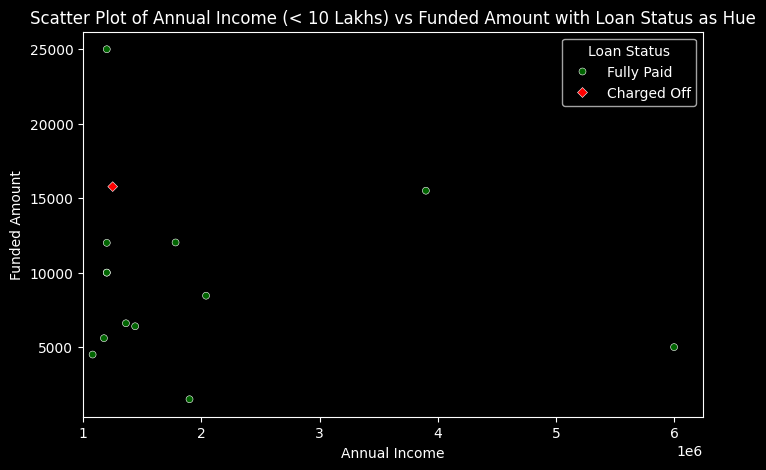

In [235]:
# # Creating Scatter Plot of Annual Income (> 10 Lakhs) vs Funded Amount with Loan Status as Hue.
filtered_loan = loan_cleaned[(loan_cleaned['annual_inc'] > 1000000)]
plt.figure(figsize=(8, 5))
custom_palette = {'Fully Paid': '#006400', 'Current': '#800080', 'Charged Off': '#FF0000'}   # Custom colors
custom_markers = {'Fully Paid': 'o', 'Current': 's', 'Charged Off': 'D'}  # Custom marker shapes

sns.scatterplot(
    data=filtered_loan,
    x='annual_inc',
    y='funded_amnt',
    hue='loan_status',
    palette=custom_palette,  
    style='loan_status',
    markers=custom_markers, 
    s=25
)

plt.title('Scatter Plot of Annual Income (< 10 Lakhs) vs Funded Amount with Loan Status as Hue')
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount')
plt.legend(title='Loan Status')
plt.xlim(1000000, None)
plt.show()

We can see there are hardly 10-12 data points which have annual income greater than 10 Lakhs which also include one data point which is charged off as well.

We can remove very high income data from df. For that we will set a threshhold.

In [237]:
round(len(loan_cleaned[loan_cleaned.annual_inc > 250000])/len(loan_cleaned)*100,2)

0.76

We set a threshhold of 2.5 Lakh as above this income, there is not much decrese in the data %, only 0.76% are above 2.5 Lakh, hence it is safe to remove those rows.

In [238]:
# remove rows which have annual_inc > 2500000
loan_cleaned = loan_cleaned[loan_cleaned.annual_inc <= 250000]
len(loan_cleaned)

39415

#### 'delinq_2yrs' column
delinq_2yrs = The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [239]:
# delinq_2yrs unique values
loan_cleaned.delinq_2yrs.value_counts()

delinq_2yrs
0     35154
1      3267
2       677
3       216
4        61
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

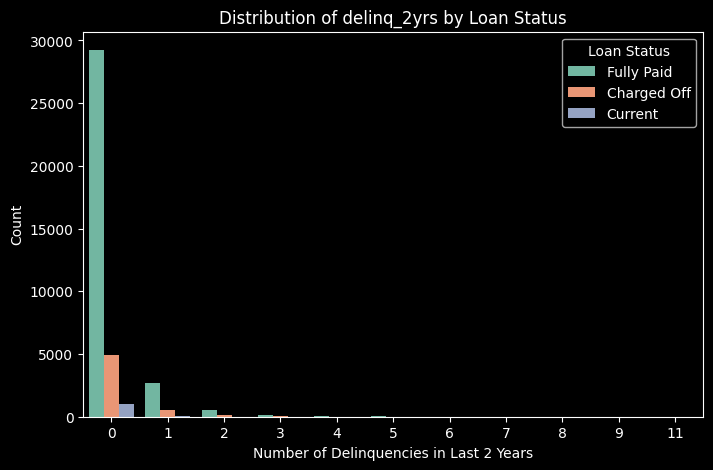

In [240]:
# Creating bar plot of delinq_2yrs by Loan Status
plt.figure(figsize=(8, 5))
sns.countplot(data=loan_cleaned, x='delinq_2yrs', hue='loan_status', palette='Set2')

plt.title('Distribution of delinq_2yrs by Loan Status')
plt.xlabel('Number of Delinquencies in Last 2 Years')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [241]:
# Creating a pivot table for all unique values of `delinq_2yrs` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='delinq_2yrs',  # Use all unique values in `delinq_2yrs`
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)

pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
delinq_2yrs,,,,,,
0,4909,1011,29234,13.96,2.88,83.16
1,504,95,2668,15.43,2.91,81.67
2,129,14,534,19.05,2.07,78.88
3,35,8,173,16.20,3.70,80.09
4,13,2,46,21.31,3.28,75.41
5,3,1,18,13.64,4.55,81.82
6,1,0,9,10.00,0.00,90.00
7,1,0,3,25.00,0.00,75.00
8,1,0,1,50.00,0.00,50.00


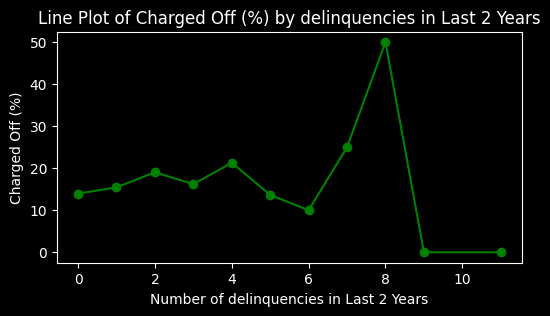

In [242]:
charged_off_percentage = pivot_table_combined['Charged Off (%)']

# Creating the line plot
plt.figure(figsize=(6, 3))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='green', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by delinquencies in Last 2 Years')
plt.xlabel('Number of delinquencies in Last 2 Years')
plt.ylabel('Charged Off (%)')
plt.show()

Any relationship? - No <br>
The person who has 11 times delinquency in the borrower's credit file for the past 2 years, has also paid his loan fully. <br>
So, clearly there is no relationship between number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years and laon status

#
#### 'inq_last_6mths' column
inq_last_6mths = The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

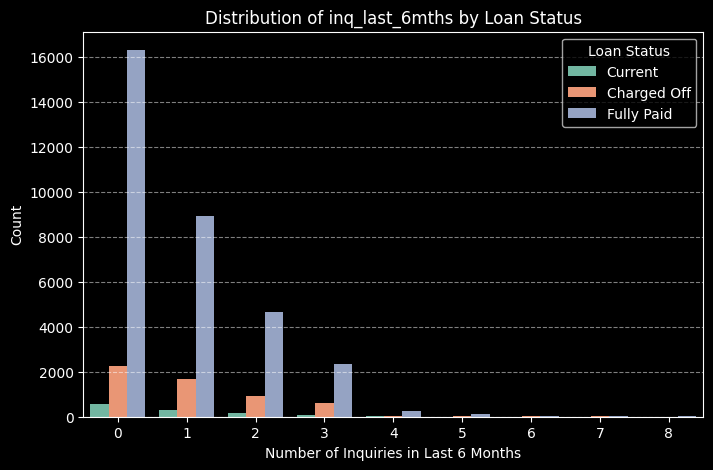

In [243]:
plt.figure(figsize=(8, 5))
sns.countplot(data=loan_cleaned, x='inq_last_6mths', hue='loan_status', palette='Set2')

plt.title('Distribution of inq_last_6mths by Loan Status')
plt.xlabel('Number of Inquiries in Last 6 Months')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [245]:
# Creating a pivot table for all unique values of `inq_last_6mths` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='inq_last_6mths',  # Use all unique values in `inq_last_6mths`
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
inq_last_6mths,,,,,,
0,2267,586,16322,11.82,3.06,85.12
1,1667,307,8913,15.31,2.82,81.87
2,940,158,4667,16.31,2.74,80.95
3,615,65,2333,20.41,2.16,77.43
4,51,10,259,15.94,3.12,80.94
5,27,2,115,18.75,1.39,79.86
6,16,1,46,25.40,1.59,73.02
7,10,1,23,29.41,2.94,67.65
8,3,1,10,21.43,7.14,71.43


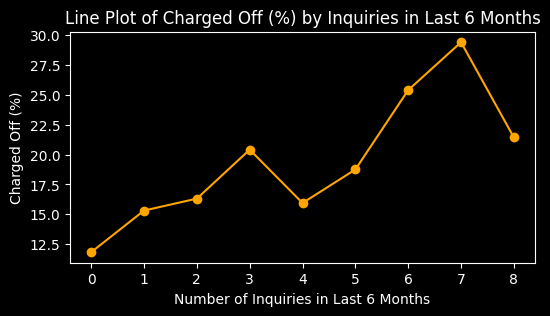

In [246]:
# Line Plot between 'Charged Off %' and 'inq_last_6mths'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(6, 3))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by Inquiries in Last 6 Months')
plt.xlabel('Number of Inquiries in Last 6 Months')
plt.ylabel('Charged Off (%)')
plt.show()

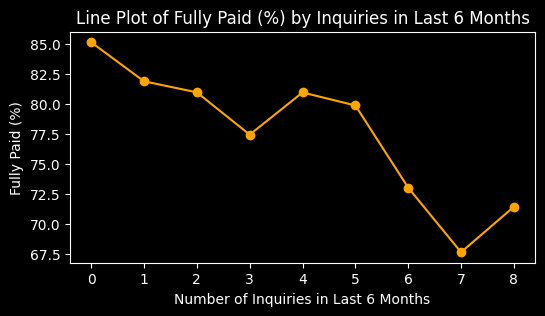

In [247]:
# Line Plot between 'Fully Paid %' and 'inq_last_6mths'
fully_paid_percentage = pivot_table_combined['Fully Paid (%)']
plt.figure(figsize=(6, 3))
plt.plot(fully_paid_percentage.index, fully_paid_percentage, marker='o', color='orange', label='Fully Paid (%)')
plt.title('Line Plot of Fully Paid (%) by Inquiries in Last 6 Months')
plt.xlabel('Number of Inquiries in Last 6 Months')
plt.ylabel('Fully Paid (%)')
plt.show()

From the above graph, can we say that with increasing number of inquiries, there are more chances of being charged off? <br>
Yes, from the graph, the above statement is true. <br>
However, practically, there may be other factors as well which are influencing the target variable. We will explore other columns and then we will come to a conclusion.

#### 'open_acc' column

In [248]:
loan_cleaned.open_acc.value_counts().sort_index()

open_acc
2      601
3     1488
4     2337
5     3169
6     3928
7     3996
8     3912
9     3697
10    3192
11    2722
12    2245
13    1886
14    1472
15    1162
16     929
17     731
18     528
19     388
20     288
21     243
22     141
23      94
24      80
25      55
26      28
27      21
28      25
29      12
30      15
31       7
32       4
33       3
34       5
35       4
36       2
38       1
39       1
41       1
42       1
44       1
Name: count, dtype: int64

In [249]:
# Creating a pivot table for all unique values of `open_acc` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='open_acc',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
open_acc,,,,,,
2,124,9,468,20.63,1.50,77.87
3,257,23,1208,17.27,1.55,81.18
4,363,43,1931,15.53,1.84,82.63
5,424,72,2673,13.38,2.27,84.35
6,543,100,3285,13.82,2.55,83.63
7,556,109,3331,13.91,2.73,83.36
8,544,120,3248,13.91,3.07,83.03
9,516,111,3070,13.96,3.00,83.04
10,462,124,2606,14.47,3.88,81.64


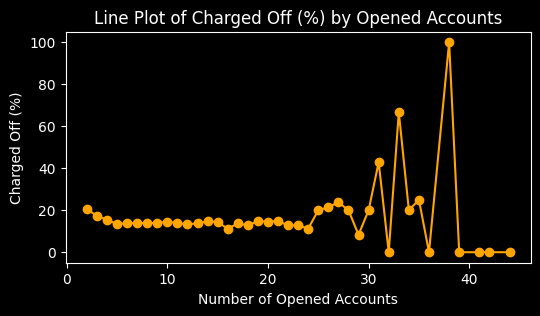

In [250]:
# Line Plot between 'Charged Off %' and 'open_acc'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(6, 3))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by Opened Accounts')
plt.xlabel('Number of Opened Accounts')
plt.ylabel('Charged Off (%)')
plt.show()

It is clear that 'open_acc' column is irrelevant. 

#### 'pub_rec' column

In [251]:
# pub_rec
loan_cleaned.pub_rec.value_counts().sort_index()

pub_rec
0    37304
1     2051
2       51
3        7
4        2
Name: count, dtype: int64

In [253]:
# Creating a pivot table for all unique values of `pub_rec` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='pub_rec',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
pub_rec,,,,,,
0,5130,1085,31089,13.75,2.91,83.34
1,456,43,1552,22.23,2.10,75.67
2,10,3,38,19.61,5.88,74.51
3,0,0,7,0.00,0.00,100.00
4,0,0,2,0.00,0.00,100.00


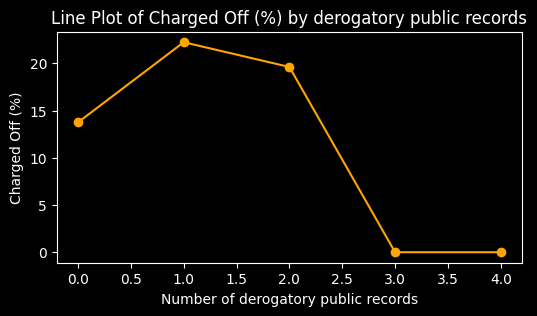

In [254]:
# Line Plot between 'Charged Off %' and 'pub_rec'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(6, 3))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by derogatory public records')
plt.xlabel('Number of derogatory public records')
plt.ylabel('Charged Off (%)')
plt.show()

pub_rec is not useful.

#### 'revol_bal' = Total credit revolving balance

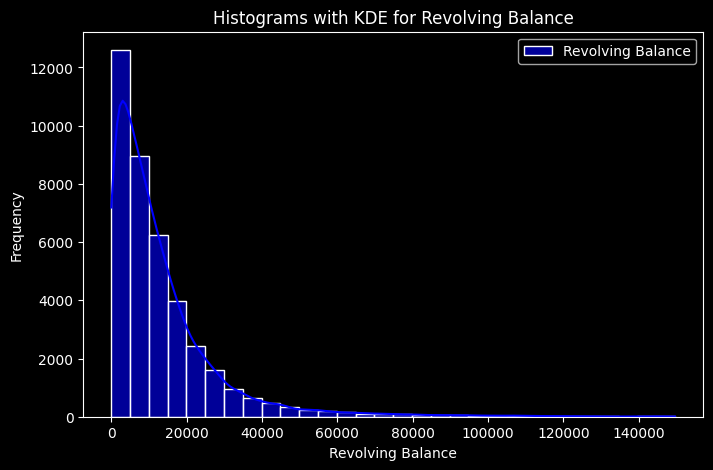

In [255]:
# 'revol_bal' is Total credit revolving balance
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['revol_bal'], kde=True, bins=30, label='Revolving Balance', color='blue', alpha=0.6)
plt.title('Histograms with KDE for Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

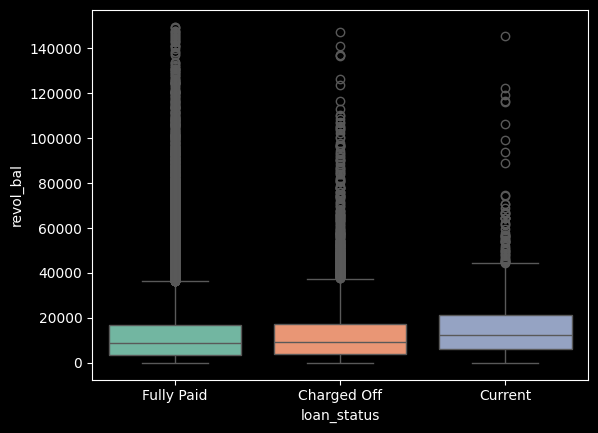

In [256]:
sns.boxplot(data=loan_cleaned, x='loan_status', y='revol_bal', palette='Set2')
plt.show()

<Axes: xlabel='loan_status', ylabel='combined_amount'>

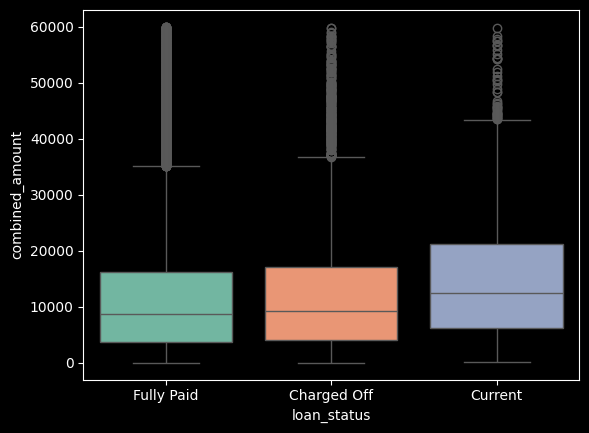

In [257]:
# we can also check with installment + revol_bal amount and compare with loan_status
loan_cleaned['combined_amount'] = loan_cleaned['installment'] + loan_cleaned['revol_bal']
sns.boxplot(data=loan_cleaned[loan_cleaned.combined_amount<=60000], x='loan_status', y='combined_amount', palette='Set2')

Not much difference or no inference or impact of installment + revol_bal on loan_status. <br>
Only Current is higher if combined amount is higher which we can understand that if laon is currently being paid in installments, then revol_bal will be higher (current loan + credit card bills)

#### 'revol_util' = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

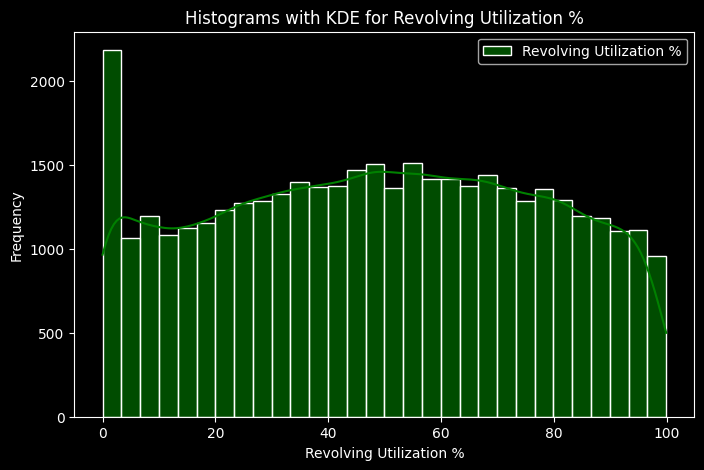

In [258]:
# 'revol_util' which is how much of the borrower's total credit limit is currently being used.
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['revol_util'], kde=True, bins=30, label='Revolving Utilization %', color='green', alpha=0.6)
plt.title('Histograms with KDE for Revolving Utilization %')
plt.xlabel('Revolving Utilization %')
plt.ylabel('Frequency')
plt.legend()
plt.show()

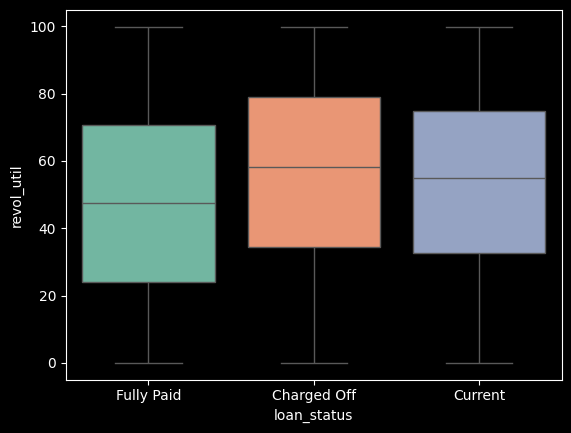

In [259]:
sns.boxplot(data=loan_cleaned, x='loan_status', y='revol_util', palette='Set2')
plt.show()

Here we can say, higher is the credit utilization of credit limit, higher the chances of being charged off.

In [260]:
# Create bins of 10 for `revol_util` from 0 to 100
bins = range(0, 110, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]
loan_cleaned['revol_util_bin'] = pd.cut(loan_cleaned['revol_util'], bins=bins, labels=labels, right=False)

# Create a pivot table for counts and percentages
pivot_table = loan_cleaned.pivot_table(
    index='revol_util_bin',
    columns='loan_status',
    aggfunc='size',
    fill_value=0
)

# Adding percentages to the pivot table
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)

pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
revol_util_bin,,,,,,
0-10,430,85,3927,9.68,1.91,88.41
10-20,332,70,2958,9.88,2.08,88.04
20-30,416,101,3274,10.97,2.66,86.36
30-40,496,117,3481,12.12,2.86,85.03
40-50,613,117,3621,14.09,2.69,83.22
50-60,630,134,3531,14.67,3.12,82.21
60-70,658,152,3426,15.53,3.59,80.88
70-80,691,133,3184,17.24,3.32,79.44
80-90,669,129,2868,18.25,3.52,78.23


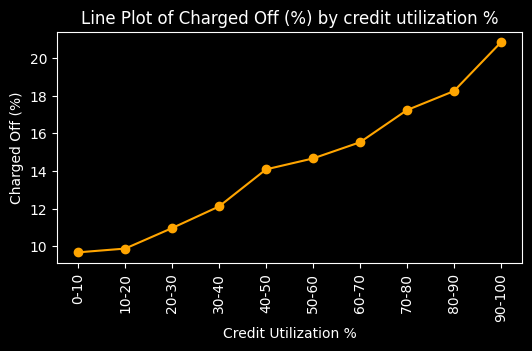

In [261]:
# Line Plot between 'Charged Off %' and 'revol_util'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(6, 3))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by credit utilization %')
plt.xlabel('Credit Utilization %')
plt.ylabel('Charged Off (%)')
plt.xticks(rotation=90)
plt.show()

So, it's a clear indication, higher the credit utilization, higher the chances of being charged off.

#### 'total_acc' column

In [262]:
# total_acc
loan_cleaned.total_acc.head()

0     9
1     4
2    10
3    37
4    38
Name: total_acc, dtype: int64

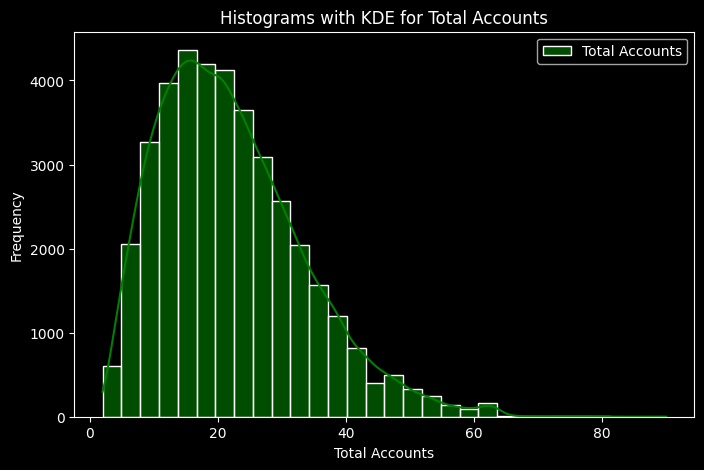

In [263]:
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['total_acc'], kde=True, bins=30, label='Total Accounts', color='green', alpha=0.6)
plt.title('Histograms with KDE for Total Accounts')
plt.xlabel('Total Accounts')
plt.ylabel('Frequency')
plt.legend()
plt.show()

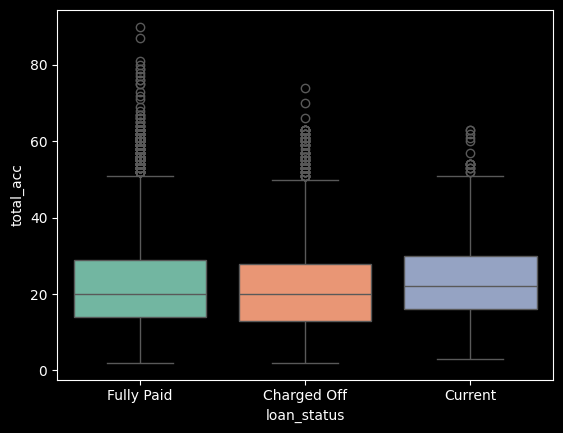

In [264]:
sns.boxplot(data=loan_cleaned, x='loan_status', y='total_acc', palette='Set2')
plt.show()

In [265]:
# Create bins of 10 for `total_acc` from 0 to 100
bins = range(0, 110, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]
loan_cleaned['total_acc_bin'] = pd.cut(loan_cleaned['total_acc'], bins=bins, labels=labels, right=False)

# Create a pivot table for counts and percentages
pivot_table = loan_cleaned.pivot_table(
    index='total_acc_bin',
    columns='loan_status',
    aggfunc='size',
    fill_value=0
)

# Adding percentages to the pivot table
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)

pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
total_acc_bin,,,,,,
0-10,786,81,3880,16.56,1.71,81.74
10-20,2011,370,11339,14.66,2.70,82.65
20-30,1533,393,9856,13.01,3.34,83.65
30-40,854,211,5058,13.95,3.45,82.61
40-50,317,52,1793,14.66,2.41,82.93
50-60,63,19,571,9.65,2.91,87.44
60-70,30,5,176,14.22,2.37,83.41
70-80,2,0,11,15.38,0.00,84.62
80-90,0,0,3,0.00,0.00,100.00


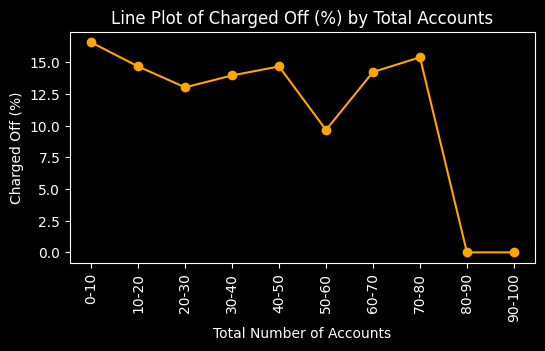

In [266]:
# Line Plot between 'Charged Off %' and 'total_acc'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(6, 3))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by Total Accounts')
plt.xlabel('Total Number of Accounts')
plt.ylabel('Charged Off (%)')
plt.xticks(rotation=90)
plt.show()

Hence, 'toal_acc' column is irrelevant.

#### 'out_prncp' = Remaining outstanding principal for total amount funded
which means if the loan status is Fully Paid, then Remaining outstanding principal should be 0. We can check it here-

In [267]:
loan_cleaned[loan_cleaned.loan_status == 'Fully Paid'].out_prncp.value_counts()

out_prncp
0.0    32688
Name: count, dtype: int64

In [268]:
loan_cleaned[loan_cleaned.loan_status == 'Charged Off'].out_prncp.value_counts()

out_prncp
0.0    5596
Name: count, dtype: int64

So for Charged Off & Fully Paid, 'out_prncp' is 0. <br>
We can cross check that the third element 

In [269]:
len(loan_cleaned[loan_cleaned.loan_status == 'Current']) == len(loan_cleaned[loan_cleaned.out_prncp > 0])

True

Then 'out_prncp' column is not releavent to make the model.

#### 'out_prncp_inv'

In [270]:
loan_cleaned[loan_cleaned.loan_status == 'Fully Paid'].out_prncp_inv.value_counts()

out_prncp_inv
0.0    32688
Name: count, dtype: int64

In [271]:
loan_cleaned[loan_cleaned.loan_status == 'Charged Off'].out_prncp_inv.value_counts()

out_prncp_inv
0.0    5596
Name: count, dtype: int64

In [272]:
len(loan_cleaned[loan_cleaned.loan_status == 'Current']) == len(loan_cleaned[loan_cleaned.out_prncp_inv > 0])

True

'out_prncp_inv' column is also not releavent to make the model.

#### 'total_pymnt' = Payments received to date for total amount funded

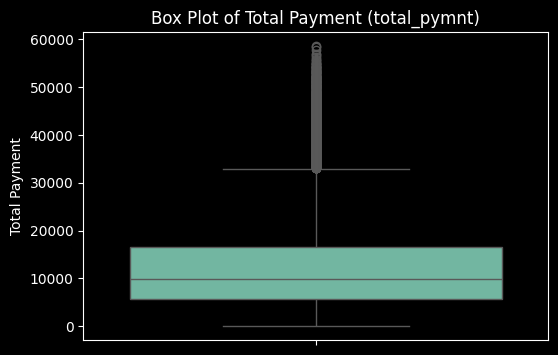

In [273]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=loan, y='total_pymnt', palette='Set2')
plt.title('Box Plot of Total Payment (total_pymnt)')
plt.ylabel('Total Payment')
plt.show()

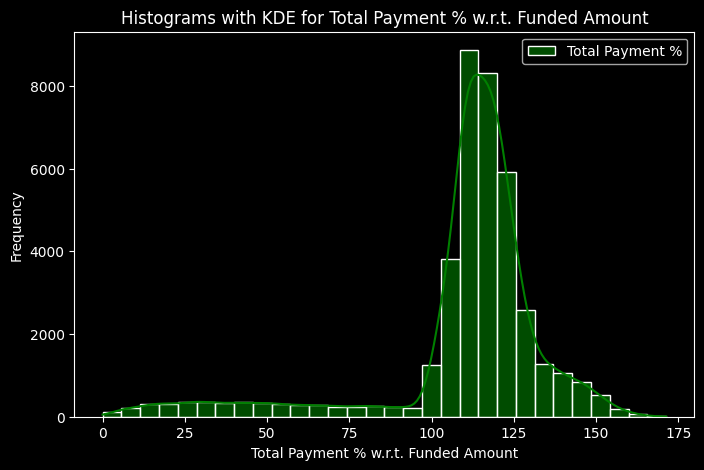

In [274]:
# Compare funded amount with total payment done.
# Make % for total payment which has been received.
loan_cleaned['total_pymnt_pct'] = (loan_cleaned['total_pymnt'] / loan_cleaned['funded_amnt']) * 100
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['total_pymnt_pct'], kde=True, bins=30, label='Total Payment %', color='green', alpha=0.6)
plt.title('Histograms with KDE for Total Payment % w.r.t. Funded Amount')
plt.xlabel('Total Payment % w.r.t. Funded Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [275]:
# Let's see relation between total payment % and loan status
# Create bins of 10 for `total_pymnt_pct` from 0 to 200
bins = range(0, 190, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]
loan_cleaned['total_pymnt_pct_bin'] = pd.cut(loan_cleaned['total_pymnt_pct'], bins=bins, labels=labels, right=False)

# Create a pivot table for counts and percentages
pivot_table = loan_cleaned.pivot_table(
    index='total_pymnt_pct_bin',
    columns='loan_status',
    aggfunc='size',
    fill_value=0
)

# Adding percentages to the pivot table
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)

pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
total_pymnt_pct_bin,,,,,,
0-10,265,0,0,100.00,0.00,0.00
10-20,520,0,0,100.00,0.00,0.00
20-30,603,0,0,100.00,0.00,0.00
30-40,585,0,0,100.00,0.00,0.00
40-50,604,0,0,100.00,0.00,0.00
50-60,522,0,0,100.00,0.00,0.00
60-70,490,0,0,100.00,0.00,0.00
70-80,431,0,0,100.00,0.00,0.00
80-90,430,0,0,100.00,0.00,0.00


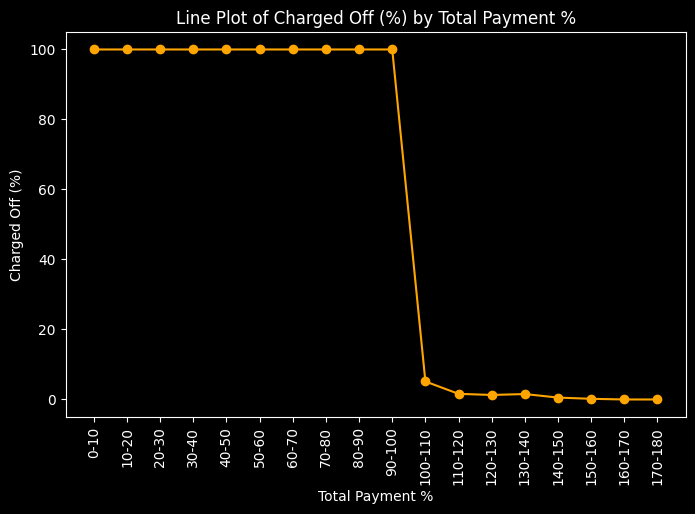

In [276]:
# Line Plot between 'Charged Off %' and 'total_pymnt_pct'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(8, 5))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by Total Payment %')
plt.xlabel('Total Payment %')
plt.ylabel('Charged Off (%)')
plt.xticks(rotation=90)
plt.show()

It's obvious that those who have paid less than 100% of the funded amount, they are charged off because Total amount paid = Funded amount + Interest. <br>
However, it does not indicate any trend between the two variables (total_pymnt_pct & loan_status).

#### 'total_rec_prncp' (total received principal amount)

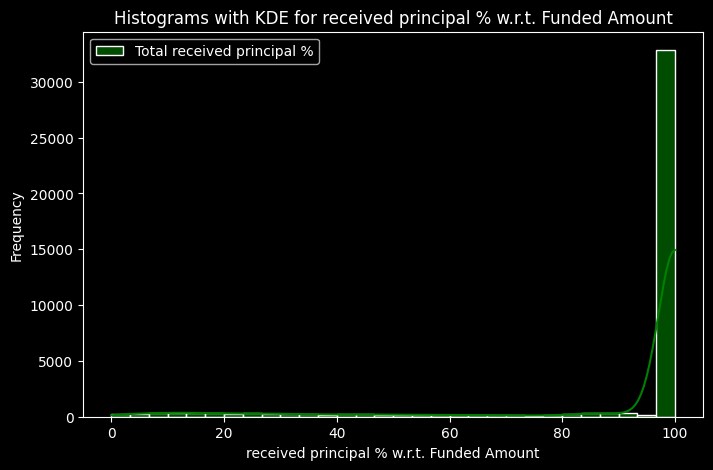

In [277]:
# Make % for total received principal amount w.r.t. funded amount.
loan_cleaned['total_rec_prncp_pct'] = (loan_cleaned['total_rec_prncp'] / loan_cleaned['funded_amnt']) * 100
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['total_rec_prncp_pct'], kde=True, bins=30, label='Total received principal %', color='green', alpha=0.6)
plt.title('Histograms with KDE for received principal % w.r.t. Funded Amount')
plt.xlabel('received principal % w.r.t. Funded Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [278]:
# Let's see relation between total received principal amouont % and loan status
# Create bins of 10 for `total_rec_prncp_pct` from 0 to 200
bins = range(0, 120, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]
loan_cleaned['total_rec_prncp_pct_bin'] = pd.cut(loan_cleaned['total_rec_prncp_pct'], bins=bins, labels=labels, right=False)

# Create a pivot table for counts and percentages
pivot_table = loan_cleaned.pivot_table(
    index='total_rec_prncp_pct_bin',
    columns='loan_status',
    aggfunc='size',
    fill_value=0
)

# Adding percentages to the pivot table
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)

pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
total_rec_prncp_pct_bin,,,,,,
0-10,900,0,0,100.00,0.00,0.00
10-20,1001,0,0,100.00,0.00,0.00
20-30,853,0,0,100.00,0.00,0.00
30-40,661,0,0,100.00,0.00,0.00
40-50,600,0,0,100.00,0.00,0.00
50-60,524,0,0,100.00,0.00,0.00
60-70,415,0,0,100.00,0.00,0.00
70-80,316,2,0,99.37,0.63,0.00
80-90,213,607,0,25.98,74.02,0.00


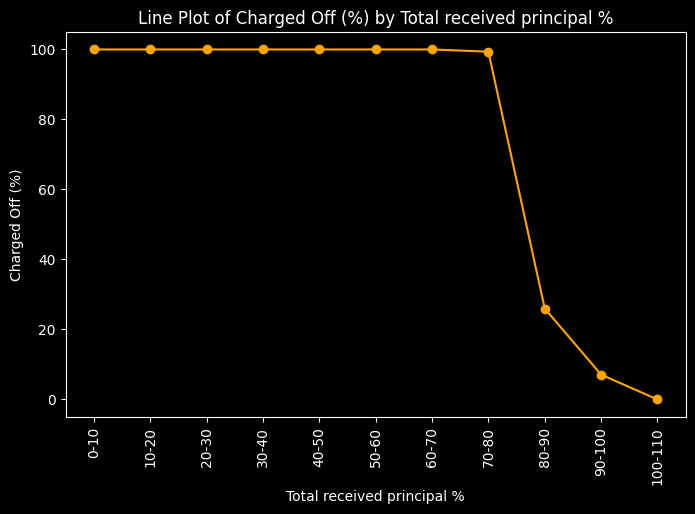

In [279]:
# Line Plot between 'Charged Off %' and 'total_rec_prncp_pct'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(8, 5))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by Total received principal %')
plt.xlabel('Total received principal %')
plt.ylabel('Charged Off (%)')
plt.xticks(rotation=90)
plt.show()

Those who have paid almost 80% or lesser of the principal amount, are 'Charged Off'.

#### 'recoveries' = recoveries post charged off

In [280]:
# recoveries = recoveries post charged off
loan_cleaned[loan_cleaned.loan_status == 'Fully Paid'].recoveries.value_counts()

recoveries
0.0    32688
Name: count, dtype: int64

In [281]:
loan_cleaned[loan_cleaned.loan_status == 'Current'].recoveries.value_counts()

recoveries
0.0    1131
Name: count, dtype: int64

recoveries are post charged off and it is only for those who are charged off. So not relevant to make our model

#### 'collection_recovery_fee'

In [282]:
# collection_recovery_fee
loan_cleaned[loan_cleaned.loan_status == 'Fully Paid'].collection_recovery_fee.value_counts()

collection_recovery_fee
0.0    32688
Name: count, dtype: int64

In [283]:
loan_cleaned[loan_cleaned.loan_status == 'Current'].collection_recovery_fee.value_counts()

collection_recovery_fee
0.0    1131
Name: count, dtype: int64

same with collection_recovery_fee, hence this column is also irrelevant.

#### 'last_pymnt_amnt'

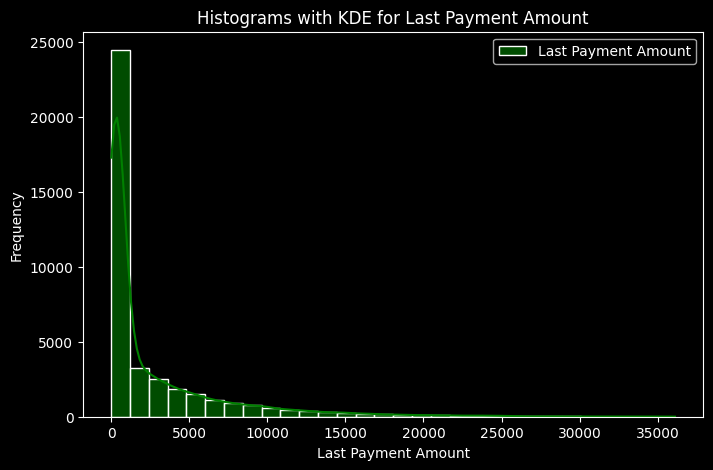

In [284]:
# last_pymnt_amnt
plt.figure(figsize=(8, 5))
sns.histplot(loan_cleaned['last_pymnt_amnt'], kde=True, bins=30, label='Last Payment Amount', color='green', alpha=0.6)
plt.title('Histograms with KDE for Last Payment Amount')
plt.xlabel('Last Payment Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

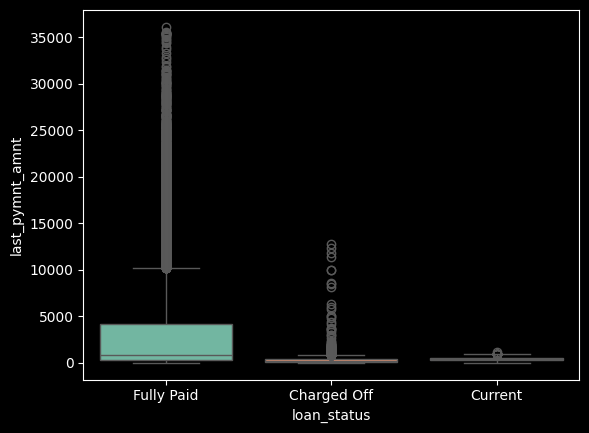

In [285]:
sns.boxplot(data=loan_cleaned, x='loan_status', y='last_pymnt_amnt', palette='Set2')
plt.show()

last payment amount is higher in case of 'Fully Paid' than the other two categories.

#### 'pub_rec_bankruptcies' = Number of public record bankruptcies

In [286]:
# pub_rec_bankruptcies = Number of public record bankruptcies
loan_cleaned.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37738
1.0     1670
2.0        7
Name: count, dtype: int64

In [287]:
loan_cleaned[loan_cleaned.loan_status == 'Charged Off'].pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    5229
1.0     365
2.0       2
Name: count, dtype: int64

In [289]:
# Creating a pivot table for all unique values of `pub_rec_bankruptcies` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='pub_rec_bankruptcies',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
pub_rec_bankruptcies,,,,,,
0.0,5229,1092,31417,13.86,2.89,83.25
1.0,365,37,1268,21.86,2.22,75.93
2.0,2,2,3,28.57,28.57,42.86


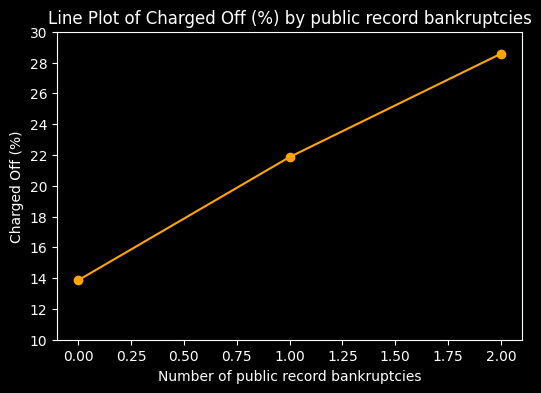

In [290]:
# Line Plot between 'Charged Off %' and 'pub_rec'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(6, 4))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by public record bankruptcies')
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Charged Off (%)')
plt.ylim(10, 30)
plt.yticks(range(10, 31, 2))
plt.show()

With increasing number of public record bankruptcies, more chances of being charged off.

#### 'term'

In [291]:
# term
loan_cleaned.term.value_counts()

term
36 months    28886
60 months    10529
Name: count, dtype: int64

In [292]:
# Creating a pivot table for all unique values of `term` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='term',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
term,,,,,,
36 months,3210,0,25676,11.11,0.00,88.89
60 months,2386,1131,7012,22.66,10.74,66.60


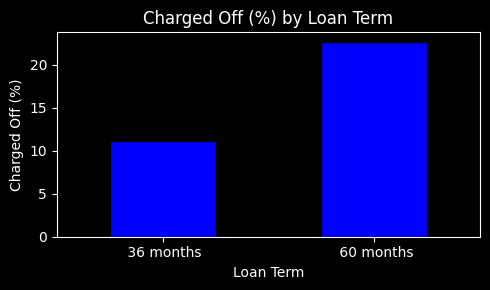

In [293]:
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(5, 3))
charged_off_percentage.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Charged Off (%) by Loan Term')
plt.xticks(rotation=0)
plt.xlabel('Loan Term')
plt.ylabel('Charged Off (%)')
plt.tight_layout()
plt.show()

Therefore, loans with a 60-month term have twice the likelihood of being charged off compared to those with a 36-month term.

#### 'grade' = LC assigned loan grade

In [294]:
# grade = LC assigned loan grade
loan_cleaned.grade.value_counts()

grade
B    11942
A    10038
C     8034
D     5263
E     2799
F     1032
G      307
Name: count, dtype: int64

In [295]:
# Creating a pivot table for all unique values of `grade` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='grade',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
grade,,,,,,
A,602,40,9396,6.00,0.40,93.60
B,1417,344,10181,11.87,2.88,85.25
C,1342,262,6430,16.70,3.26,80.03
D,1116,218,3929,21.20,4.14,74.65
E,707,178,1914,25.26,6.36,68.38
F,313,72,647,30.33,6.98,62.69
G,99,17,191,32.25,5.54,62.21


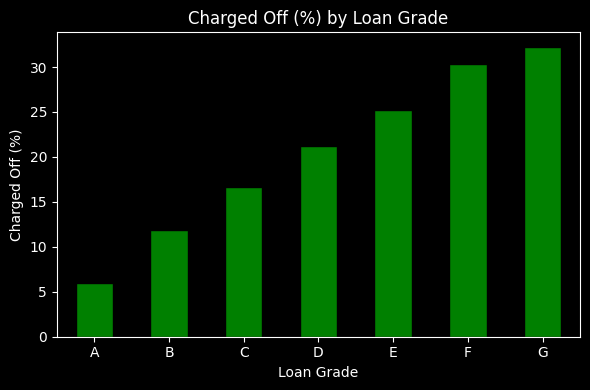

In [296]:
# Bar Plot between 'Charged Off %' and 'Grade'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(6, 4))
charged_off_percentage.plot(kind='bar', color='green', edgecolor='black')
plt.title('Charged Off (%) by Loan Grade')
plt.xticks(rotation=0)
plt.xlabel('Loan Grade')
plt.ylabel('Charged Off (%)')
plt.tight_layout()
plt.show()

From A to G in Loan Grade, likelihood of being charged off is also increasing.

#### 'sub_grade'

In [297]:
loan_cleaned.sub_grade.value_counts()

sub_grade
B3    2891
A4    2874
A5    2726
B5    2691
B4    2500
C1    2116
B2    2038
C2    1996
B1    1822
A3    1802
C3    1515
A2    1500
D2    1338
C4    1230
C5    1177
D3    1163
A1    1136
D4     973
D1     925
D5     864
E1     756
E2     647
E3     544
E4     449
E5     403
F1     324
F2     248
F3     181
F4     165
F5     114
G1     102
G2      76
G4      53
G3      47
G5      29
Name: count, dtype: int64

In [298]:
# Creating a pivot table for all unique values of `sub_grade` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='sub_grade',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
sub_grade,,,,,,
A1,30,0,1106,2.64,0.00,97.36
A2,74,0,1426,4.93,0.00,95.07
A3,103,0,1699,5.72,0.00,94.28
A4,178,13,2683,6.19,0.45,93.35
A5,217,27,2482,7.96,0.99,91.05
B1,170,33,1619,9.33,1.81,88.86
B2,226,56,1756,11.09,2.75,86.16
B3,337,92,2462,11.66,3.18,85.16
B4,328,74,2098,13.12,2.96,83.92


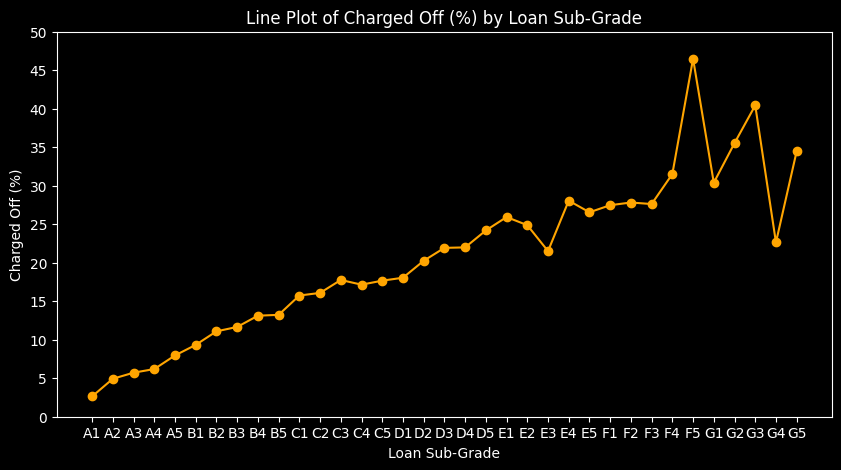

In [299]:
# Line Plot between 'Charged Off %' and 'sub_grade'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(10, 5))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by Loan Sub-Grade')
plt.xlabel('Loan Sub-Grade')
plt.ylabel('Charged Off (%)')
plt.ylim(0, 50)
plt.yticks(range(0, 51, 5))
plt.show()

We don't know how they have categorized the grade, but it's obvious that as we go from A1 to G5, the % of being charged off is increasing.

#### 'emp_length'

In [300]:
# emp_length
loan_cleaned.emp_length.value_counts()

emp_length
10+ years    8770
< 1 year     4560
2 years      4363
3 years      4066
4 years      3417
5 years      3261
1 year       3217
6 years      2215
7 years      1761
8 years      1466
9 years      1248
unknown      1071
Name: count, dtype: int64

In [301]:
# Creating a pivot table for all unique values of `emp_length` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='emp_length',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
emp_length,,,,,,
1 year,455,69,2693,14.14,2.14,83.71
10+ years,1319,388,7063,15.04,4.42,80.54
2 years,565,97,3701,12.95,2.22,84.83
3 years,552,83,3431,13.58,2.04,84.38
4 years,458,94,2865,13.40,2.75,83.85
5 years,456,87,2718,13.98,2.67,83.35
6 years,305,60,1850,13.77,2.71,83.52
7 years,262,62,1437,14.88,3.52,81.60
8 years,203,43,1220,13.85,2.93,83.22


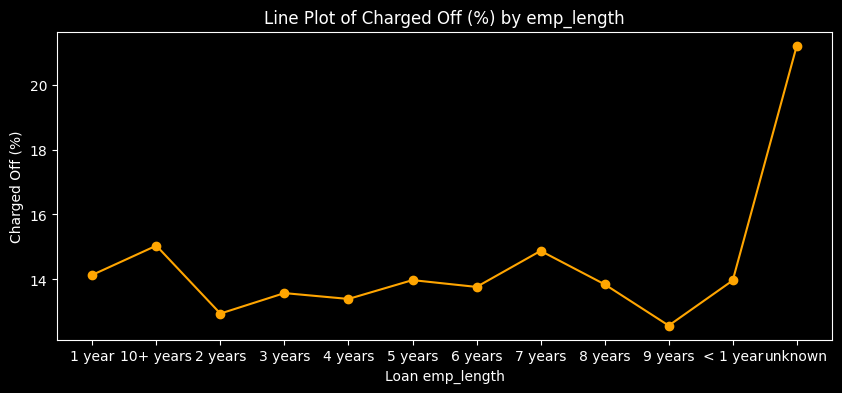

In [302]:
# Line Plot between 'Charged Off %' and 'emp_length'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(10, 4))
plt.plot(charged_off_percentage.index, charged_off_percentage, marker='o', color='orange', label='Charged Off (%)')
plt.title('Line Plot of Charged Off (%) by emp_length')
plt.xlabel('Loan emp_length')
plt.ylabel('Charged Off (%)')
plt.show()

No inference from emp_length. Hence, we can say it is irrelavant column.

#### 'home_ownership'

In [303]:
# home_ownership
loan_cleaned.home_ownership.value_counts()

home_ownership
RENT        18832
MORTGAGE    17447
OWN          3036
OTHER          97
NONE            3
Name: count, dtype: int64

In [305]:
# Creating a pivot table for all unique values of `home_ownership` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='home_ownership',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined = pivot_table_combined.sort_values('Charged Off (%)')
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
home_ownership,,,,,,
NONE,0,0,3,0.00,0.00,100.00
MORTGAGE,2309,631,14507,13.23,3.62,83.15
OWN,440,83,2513,14.49,2.73,82.77
RENT,2829,417,15586,15.02,2.21,82.76
OTHER,18,0,79,18.56,0.00,81.44


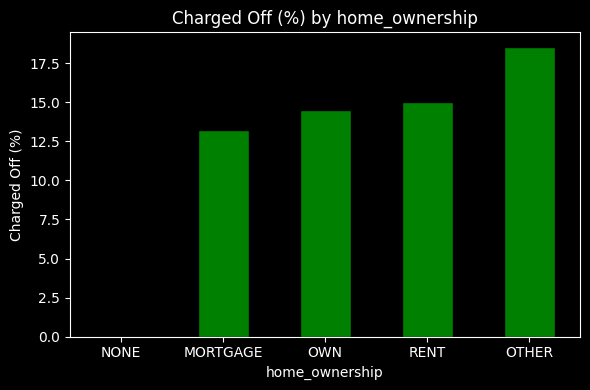

In [306]:
# Bar Plot between 'Charged Off %' and 'home_ownership'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(6, 4))
charged_off_percentage.plot(kind='bar', color='green', edgecolor='black')
plt.title('Charged Off (%) by home_ownership')
plt.xticks(rotation=0)
plt.xlabel('home_ownership')
plt.ylabel('Charged Off (%)')
plt.tight_layout()
plt.show()

Not much difference between home_ownership categories. <br>
There are slight variations of being charged off in case of home_ownership which is OTHER > RENT > OWN > MORTGAGE. OTHER has the highest chances of being charged off.


#### 'verification_status'

In [307]:
# verification_status
loan_cleaned.verification_status.value_counts()

verification_status
Not Verified       16847
Verified           12675
Source Verified     9893
Name: count, dtype: int64

In [308]:
# Creating a pivot table for all unique values of `verification_status` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='verification_status',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
# Displaying the combined pivot table
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
verification_status,,,,,,
Not Verified,2134,227,14486,12.67,1.35,85.99
Source Verified,1424,307,8162,14.39,3.10,82.50
Verified,2038,597,10040,16.08,4.71,79.21


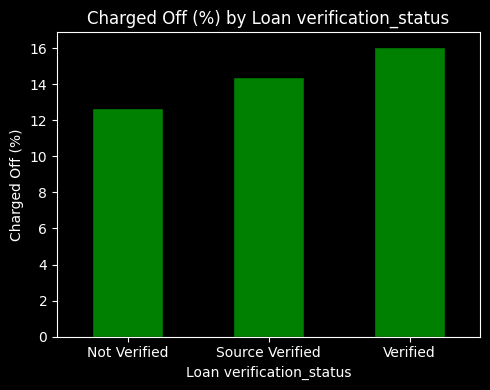

In [309]:
# Bar Plot between 'Charged Off %' and 'verification_status'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(5, 4))
charged_off_percentage.plot(kind='bar', color='green', edgecolor='black')
plt.title('Charged Off (%) by Loan verification_status')
plt.xticks(rotation=0)
plt.xlabel('Loan verification_status')
plt.ylabel('Charged Off (%)')
plt.tight_layout()
plt.show()

This is a surprise that the loans which are verified have higher chances of being charged off than those which are not verified.

#### 'purpose'

In [310]:
# purpose
loan_cleaned.purpose.value_counts()

purpose
debt_consolidation    18531
credit_card            5099
other                  3969
home_improvement       2909
major_purchase         2170
small_business         1809
car                    1547
wedding                 938
medical                 687
moving                  577
vacation                381
house                   373
educational             324
renewable_energy        101
Name: count, dtype: int64

In [311]:
# Creating a pivot table for all unique values of `purpose` and `loan_status`
pivot_table = (
    loan_cleaned
    .pivot_table(
        index='purpose',  
        columns='loan_status',
        aggfunc='size',
        fill_value=0
    )
)

# Adding a percentage breakdown for each row
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Combining counts and percentages into one DataFrame
pivot_table_combined = pd.concat(
    [pivot_table, pivot_table_percentage.rename(columns=lambda x: f"{x} (%)")],
    axis=1
).round(2)
pivot_table_combined = pivot_table_combined.sort_values(by='Charged Off (%)', ascending=True)
pivot_table_combined

loan_status,Charged Off,Current,Fully Paid,Charged Off (%),Current (%),Fully Paid (%)
purpose,,,,,,
wedding,94,20,824,10.02,2.13,87.85
major_purchase,220,37,1913,10.14,1.71,88.16
car,160,50,1337,10.34,3.23,86.43
credit_card,540,103,4456,10.59,2.02,87.39
home_improvement,340,98,2471,11.69,3.37,84.94
vacation,53,6,322,13.91,1.57,84.51
debt_consolidation,2756,582,15193,14.87,3.14,81.99
medical,106,12,569,15.43,1.75,82.82
house,58,14,301,15.55,3.75,80.70


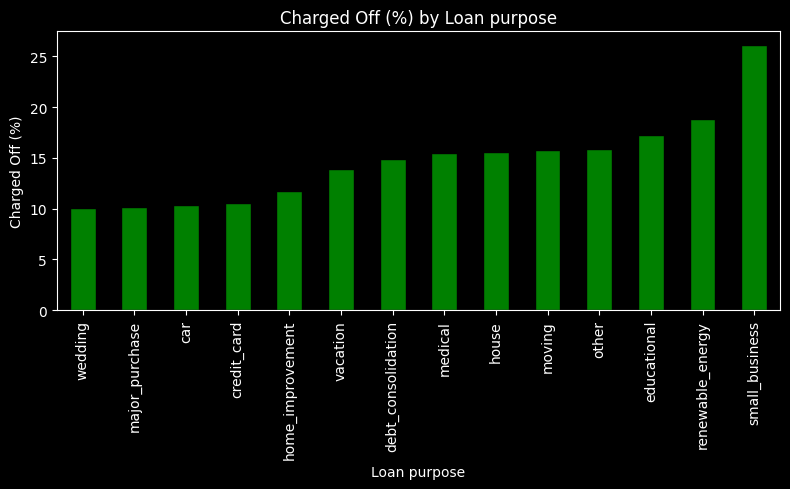

In [312]:
# Bar Plot between 'Charged Off %' and 'purpose'
charged_off_percentage = pivot_table_combined['Charged Off (%)']
plt.figure(figsize=(8, 5))
charged_off_percentage.plot(kind='bar', color='green', edgecolor='black')
plt.title('Charged Off (%) by Loan purpose')
#plt.xticks(rotation=0)
plt.xlabel('Loan purpose')
plt.ylabel('Charged Off (%)')
plt.tight_layout()
plt.show()

Therefore, loans for small business purpose is at the most risk and chances are high of being charged off than other categories.

#### With this, we have come to an end of univariate, bivariate and multivariate analysis
we can remove irrelevant columns which we identified which are 'open_acc', 'pub_rec', 'total_acc', 'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee', 'emp_length', 'home_ownership', 

In [313]:
# Dropping the specified columns from loan_cleaned
columns_to_drop = [
    'open_acc', 'pub_rec', 'total_acc', 'out_prncp', 
    'out_prncp_inv', 'recoveries', 'collection_recovery_fee', 
    'emp_length', 'home_ownership'
]
loan_cleaned = loan_cleaned.drop(columns=columns_to_drop)
loan_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'term', 'grade', 'sub_grade', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'combined_amount', 'revol_util_bin', 'total_acc_bin', 'total_pymnt_pct', 'total_pymnt_pct_bin', 'total_rec_prncp_pct', 'total_rec_prncp_pct_bin'], dtype='object')

In [314]:
loan_cleaned.shape

(39415, 37)

Here are 37 columns and in which we created some columns like 'revol_util_bin', 'total_acc_bin', 'total_pymnt_pct_bin' etc. which are created from existing columns

In [315]:
# Dropping the specified columns from loan_cleaned
columns_to_drop = [
    'revol_util_bin', 'total_acc_bin', 'total_pymnt_pct_bin', 'total_rec_prncp_pct_bin'
]
loan_cleaned = loan_cleaned.drop(columns=columns_to_drop)
loan_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'term', 'grade', 'sub_grade', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'combined_amount', 'total_pymnt_pct', 'total_rec_prncp_pct'], dtype='object')

In [317]:
loan_cleaned.shape

(39415, 33)

### Now, we are ready to make our machine learning model.

## 4. Insights

1. As Annual income is rising, installment amount is also rising till annual_inc < 1 Lakh. After that it is random.

2. As annual income is incresing, funded amount has also increased but this is limited to annual income < 1 Lakh, after that it is random <br>
3. With increasing number of inquiries in last 6 months, there are more chances of being charged off <br>
4. Higher the credit utilization %, higher the chances of being charged off. <br>
5. Those who have paid (total payment) equal to or less than 100% of the funded amount, they are charged off <br>
6. Those who have paid almost 80% or lesser of the principal amount, are 'Charged Off' <br>
7. Last payment amounts are way higher in case of 'Fully Paid' than the other two categories - Charged Off, Current <br>
8. With increasing number of public record bankruptcies, there are more chances of being charged off. <br>
9. Loans with a 60-month term have twice the likelihood of being charged off compared to those with a 36-month term. <br>
10. From A to G in Loan Grades, likelihood of being charged off is also increasing. <br>
11. As we go from A1 to G5 in Loan subgrade, the % of being charged off is increasing. <br>
12. There are slight variations of being charged off in case of home_ownership which is OTHER > RENT > OWN > MORTGAGE. OTHER has the highest chances of being charged off. <br>
13. Surprisingly, the loans which are verified have higher chances of being charged off than those which are not verified. <br>
14. Loans for small business purpose is at the most risk and chances are high of being charged off than other categories.
